In [1]:
import pandas as pd
import numpy as np

In [2]:
data_raw = pd.read_csv('df/Index2018.csv')
#stocks

In [271]:
df = data_raw.copy()

In [272]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [273]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [275]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [276]:
import matplotlib.pyplot as plt


<AxesSubplot:title={'center':'snp500 stocks'}>

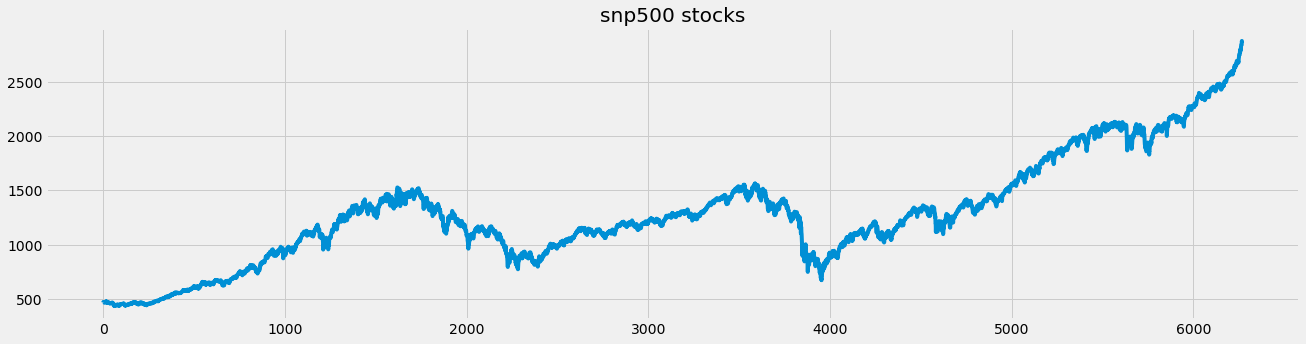

In [277]:
plt.style.use('fivethirtyeight')
df.spx.plot(title = 'snp500 stocks',figsize=(20,5))

<AxesSubplot:title={'center':'ftse stocks'}>

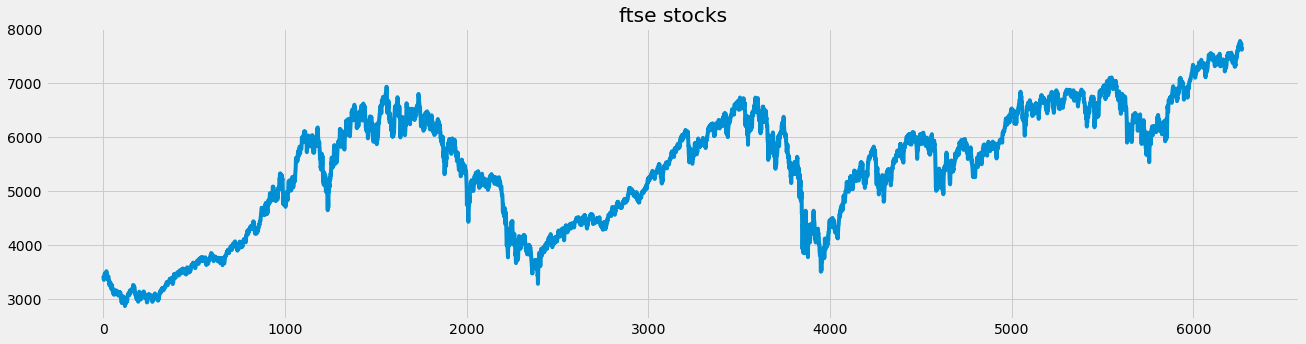

In [278]:
df.ftse.plot(title = 'ftse stocks',figsize=(20,5))

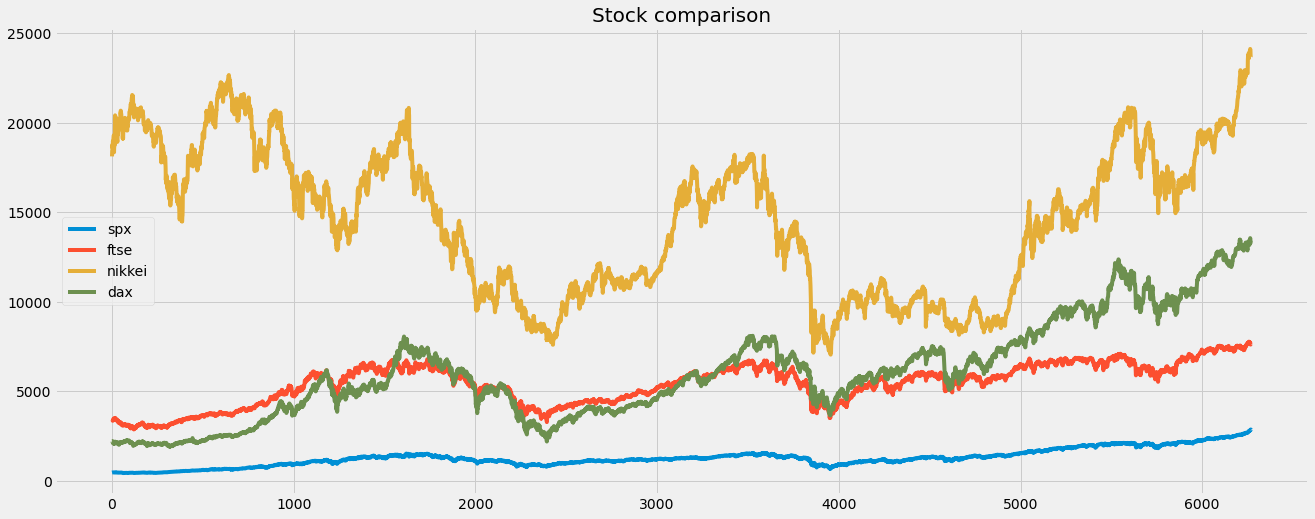

In [279]:
df.spx.plot(title = 'snp500 stocks',figsize=(20,8))
df.ftse.plot(title = 'ftse stocks',figsize=(20,8))
df.nikkei.plot(title = 'ftse stocks',figsize=(20,8))
df.dax.plot(title = 'ftse stocks',figsize=(20,8))
plt.title('Stock comparison', size = 20)
plt.legend()

### QQ Plot

In [280]:
import pylab
import scipy.stats

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 438.92    ,  441.49    ,  441.96    , ..., 2839.253031,
         2853.528411, 2872.867839])),
 (476.460561028412, 1288.1275420815123, 0.9767273150948816))

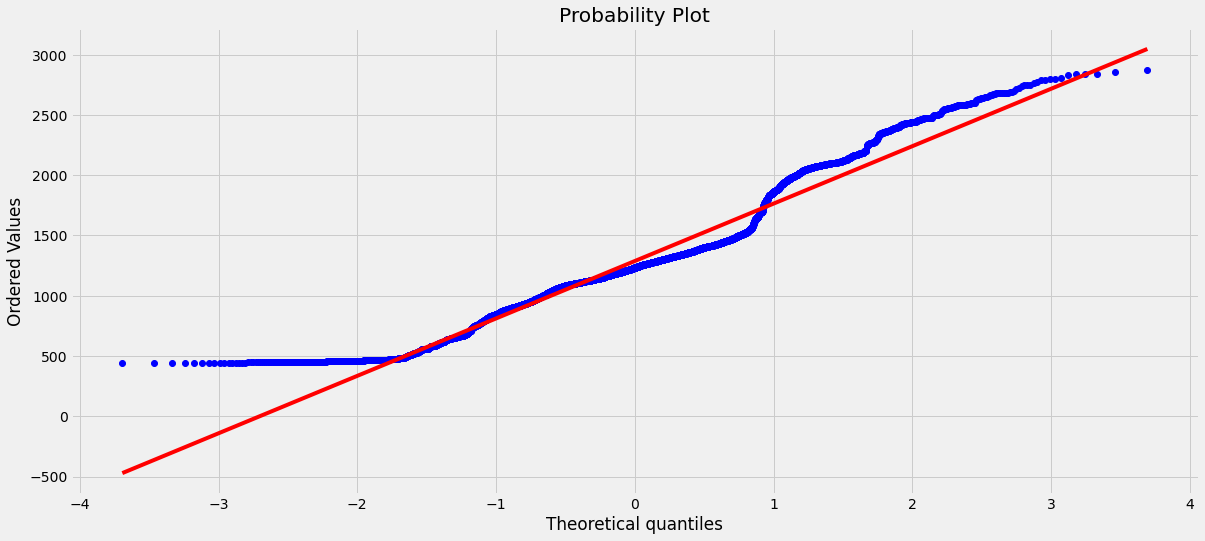

In [281]:
scipy.stats.probplot(df.spx, plot = pylab)

In [282]:
# changing date column into datetime

In [283]:
df.date = pd.to_datetime(df.date,dayfirst=True)


In [284]:
df = df.sort_values(by = 'date')

In [285]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [286]:
df.date.describe()

count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [287]:
#set index 

In [288]:
df.set_index('date',inplace = True)

In [289]:
# setting frequency
df.asfreq('d')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [290]:
# setting frequency
df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [291]:
# Missing values

In [292]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [296]:
df.spx = df.spx.fillna(method = 'ffill')# front filling(taking previous value)
df.ftse = df.ftse.fillna(method = 'bfill')# back filling(taking next value)

In [297]:
df.dax = df.dax.fillna(df.dax.mean())
df.nikkei = df.nikkei.fillna(method = 'ffill')

In [298]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Lets predict the ftse

In [299]:
ftse = df.ftse

In [300]:
ftse.describe()

count    6277.000000
mean     5423.690398
std      1145.568370
min      2876.600000
25%      4487.880000
50%      5663.300000
75%      6304.630175
max      7778.637689
Name: ftse, dtype: float64

In [301]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

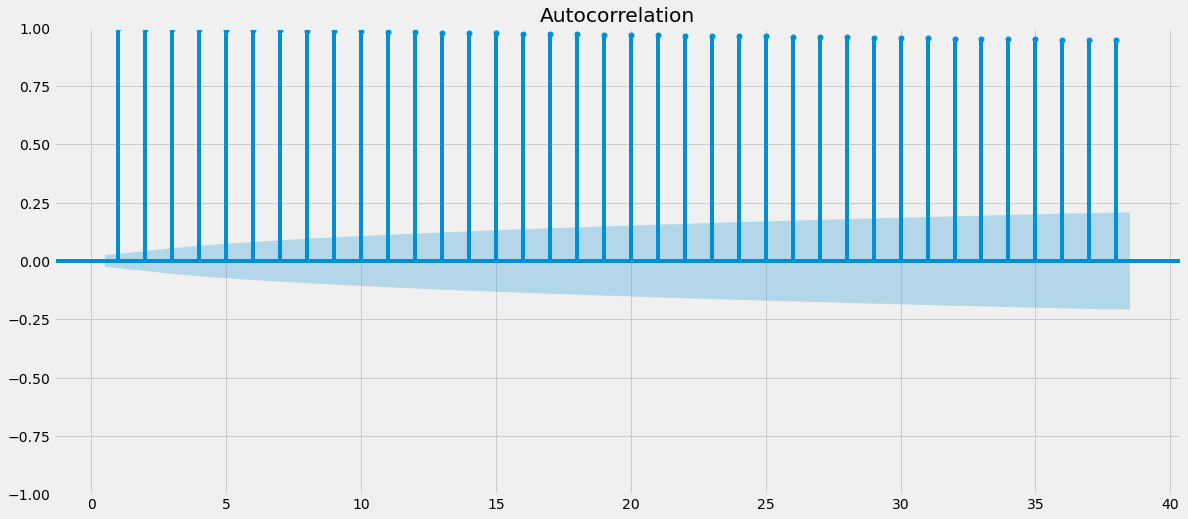

In [302]:
plot_acf(ftse,zero= False);

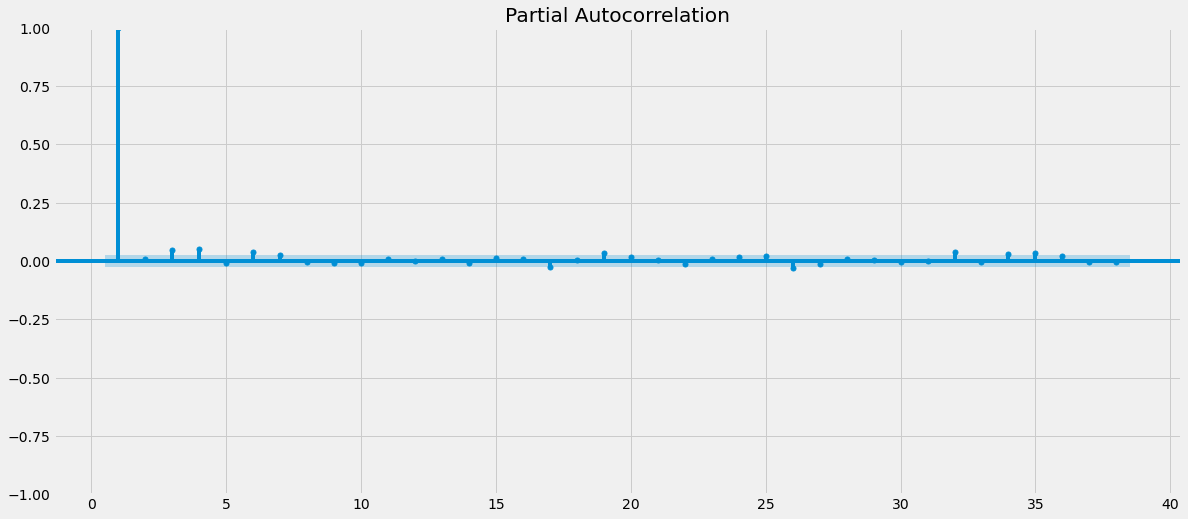

In [303]:
plot_pacf(ftse,zero= False,method = ('ols'));

In [304]:
from statsmodels.tsa.stattools import adfuller

In [305]:
adfuller(ftse)

(-1.598833621962052,
 0.4841793579044605,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68477.33735716512)

data is not stationary. lets take returns

In [306]:
returns = ftse.pct_change().mul(100)

In [307]:
returns=returns.dropna()

In [308]:
adfuller(returns)

(-15.139421215023111,
 7.045534847763736e-28,
 33,
 6242,
 {'1%': -3.4313980601154883,
  '5%': -2.8620031495251346,
  '10%': -2.567016531562964},
 19028.497135210317)

data is stationary

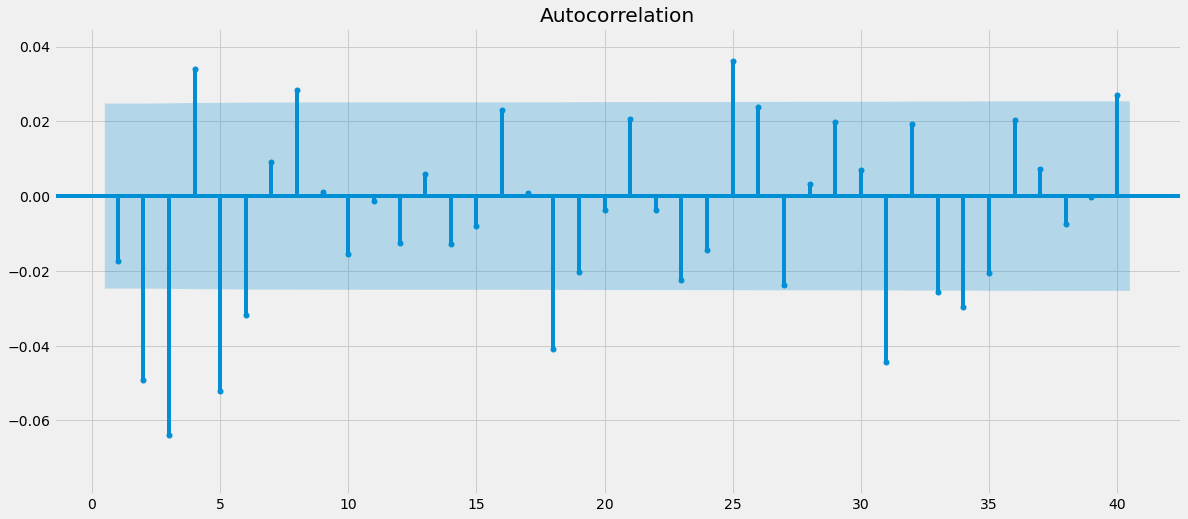

In [309]:
plot_acf(returns,lags = 40,zero = False,auto_ylims = True);

significant lags at 2,3,4,5,6

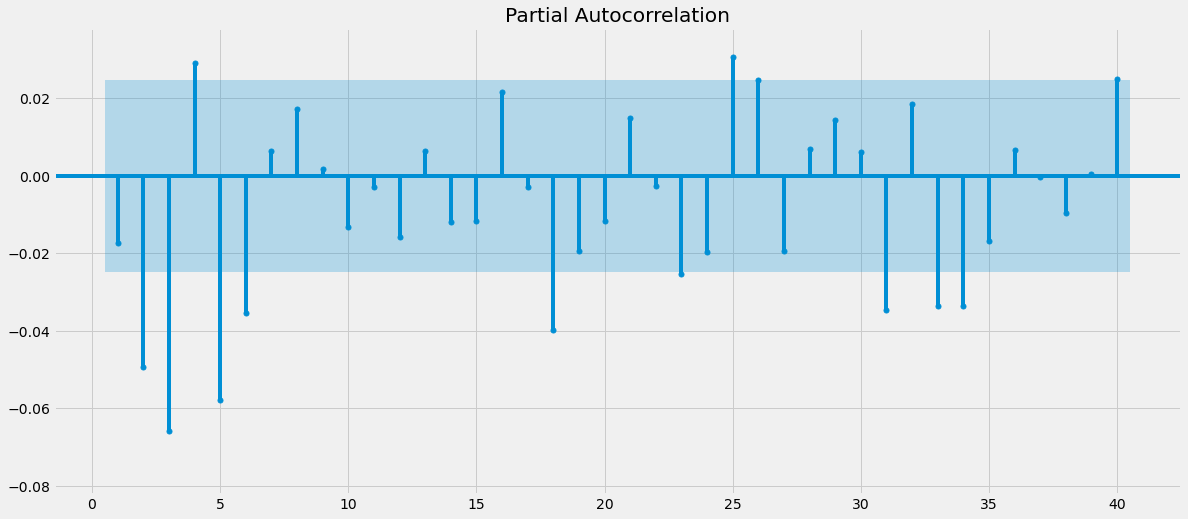

In [310]:
plot_pacf(returns,lags = 40,zero = False,auto_ylims = True);

significant lags at 2,3,4,5,6

In [311]:
## Splitting into train and test
size = int(len(ftse)*0.8)
train_df = ftse.iloc[:size]
test_df = ftse.iloc[size:]

In [312]:
size1 = int(len(returns)*0.8)
train_ret =returns.iloc[:size1]
test_ret = returns.iloc[size1:]

In [313]:
train_ret.tail()

date
2013-04-01    0.000000
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
Freq: B, Name: ftse, dtype: float64

In [314]:
test_ret.head()

date
2013-04-08    0.434736
2013-04-09    0.577670
2013-04-10    1.174840
2013-04-11    0.450420
2013-04-12   -0.494846
Freq: B, Name: ftse, dtype: float64

In [315]:
from statsmodels.tsa.arima.model import ARIMA

In [316]:
model66 = ARIMA(train_ret,order = (6,0,6)) 
model_result66 = model66.fit()
model_result66.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(6, 0, 6)   Log Likelihood               -7884.042
Date:                Wed, 16 Nov 2022   AIC                          15796.083
Time:                        12:26:41   BIC                          15887.380
Sample:                    01-10-1994   HQIC                         15828.075
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.015      1.293      0.196      -0.010       0.048
ar.L1         -0.5038      1.559     -0.323      0.747      -3.560       2.552
ar.L2         -0.5461      0.138     -3.955      0.000      -0.817      -0.275
ar.L3         -0.3586      0.882     -0.406      0.684      -2.088       1.371
ar.L4          0.2155      0.152      1.417      0.157      -0.083       0.514
ar.L5          0.2203      0.423      0.521      0.602      -0.609       1.049
ar.L6          0.0068      0.201      0.034      0.973      -0.388       0.401
ma.L1          0.4817      1.558      0.309      0.757      -2.572       3.535
ma.L2          0.4877      0.122      4.012      0.000       0.249       0.726
ma.L3          0.2435      0.808      0.301      0.763      -1.340       1.827
ma.L4         -0.2474      0.088     -2.796      0.005      -0.421      -0.074
ma.L5         -0.3056      0.403     -0.758      0.449      -1.096       0.485
ma.L6         -0.0532      0.330     -0.162      0.872      -0.699       0.593
sigma2         1.3562      0.015     88.412      0.000       1.326       1.386
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              6466.72
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [317]:
model65 = ARIMA(train_ret,order = (6,0,5)) 
model_result65 = model65.fit()
model_result65.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(6, 0, 5)   Log Likelihood               -7884.049
Date:                Wed, 16 Nov 2022   AIC                          15794.098
Time:                        12:27:09   BIC                          15878.874
Sample:                    01-10-1994   HQIC                         15823.805
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.284      0.199      -0.010       0.048
ar.L1         -0.4325      0.351     -1.232      0.218      -1.120       0.255
ar.L2         -0.5205      0.097     -5.362      0.000      -0.711      -0.330
ar.L3         -0.3515      0.249     -1.409      0.159      -0.841       0.137
ar.L4          0.1777      0.101      1.757      0.079      -0.021       0.376
ar.L5          0.1868      0.097      1.918      0.055      -0.004       0.378
ar.L6         -0.0454      0.039     -1.168      0.243      -0.122       0.031
ma.L1          0.4075      0.351      1.162      0.245      -0.280       1.095
ma.L2          0.4617      0.100      4.627      0.000       0.266       0.657
ma.L3          0.2388      0.234      1.019      0.308      -0.220       0.698
ma.L4         -0.2059      0.080     -2.569      0.010      -0.363      -0.049
ma.L5         -0.2755      0.091     -3.035      0.002      -0.453      -0.098
sigma2         1.3541      0.015     89.331      0.000       1.324       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6435.53
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### LLR

In [318]:
from scipy.stats.distributions import chi2

In [319]:
def llr(mod1,mod2,deg = 1):
    l1 = mod1.fit().llf
    l2 = mod2.fit().llf
    lr = 2*(l2-l1)
    p = chi2.sf(lr,deg)
    return p

In [320]:
llr(model65,model66)

0.901743571917782

 LLR is greater than .05 so model65 is better option for now

<AxesSubplot:xlabel='date'>

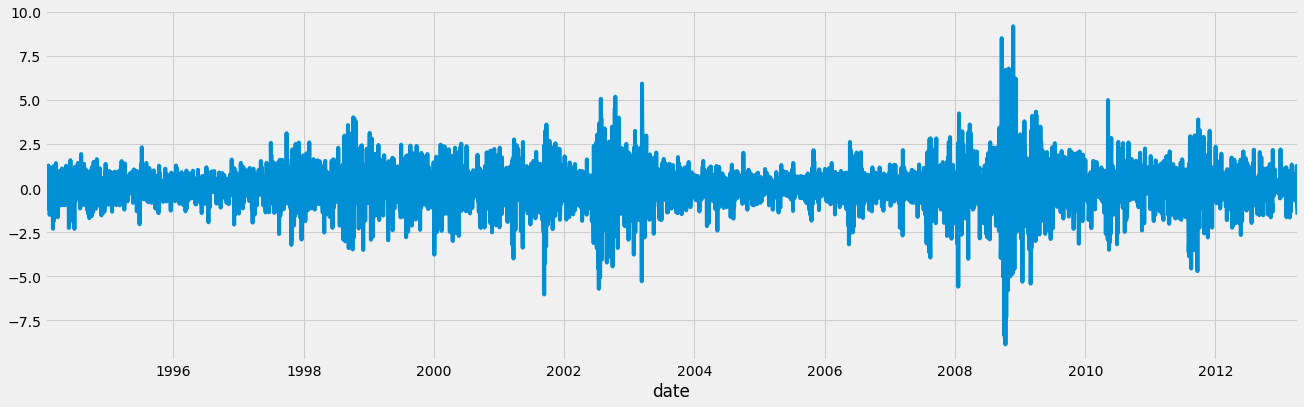

In [321]:
resid65 = model_result65.resid
resid65.plot(figsize= (20,6))

In [322]:
adfuller(resid65)

(-70.80470199865832,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15686.611218268052)

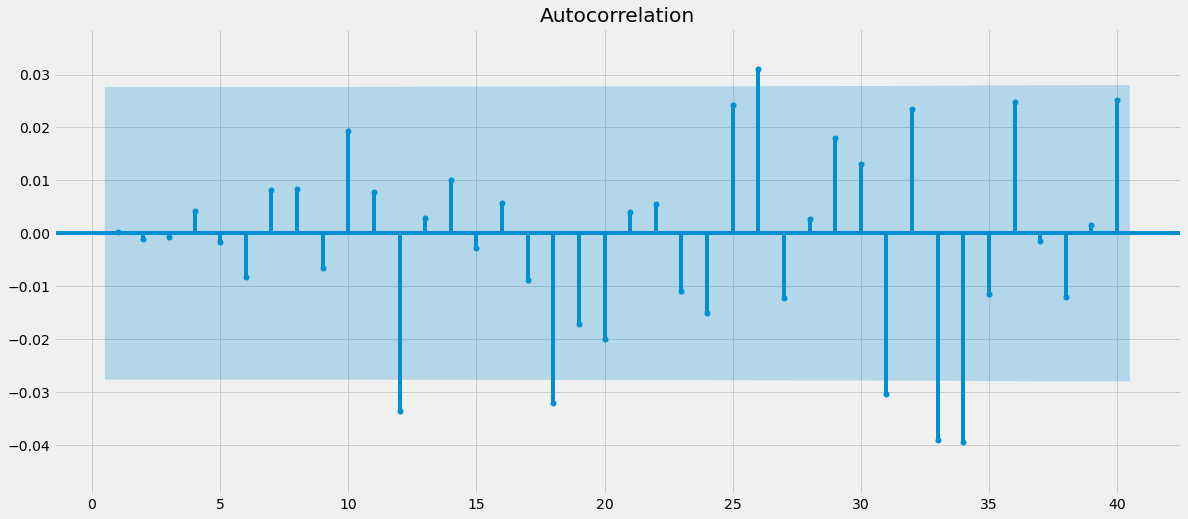

In [323]:
plot_acf(resid65,lags = 40,zero = False,auto_ylims = True);

### Lets predict with this model

In [324]:
# Now lets predic with the model
start_date = test_ret.index[0]
end_date = test_ret.index[25]
pred_65 = model_result65.predict(start = start_date, end = end_date)

In [325]:
len(pred_65)

26

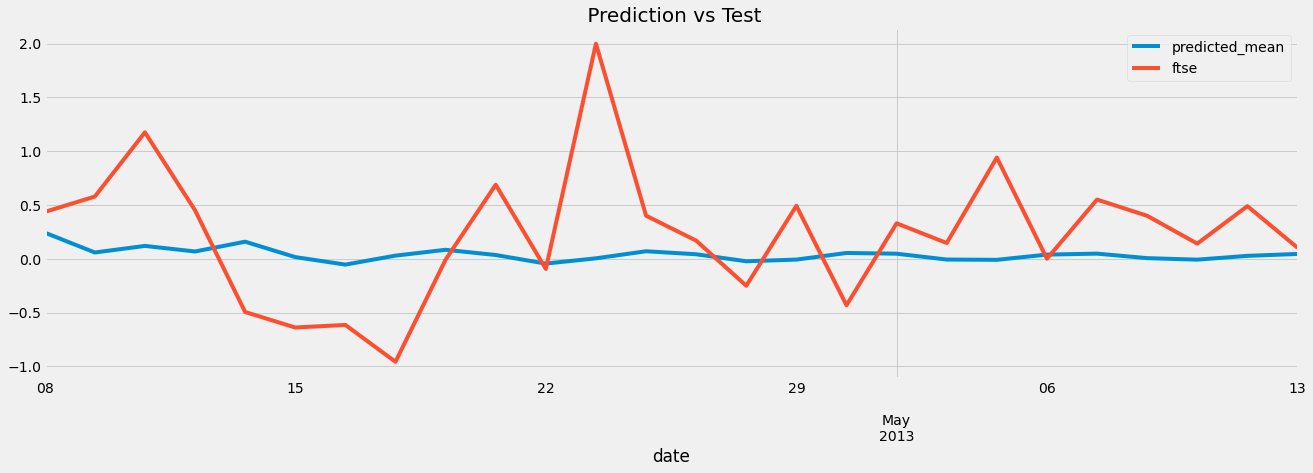

In [326]:
pred_65.plot(figsize = (20,6))
test_ret[:end_date].plot(figsize = (20,6))
plt.title(' Prediction vs Test',size = 20)
plt.legend()

**performing ets decomposition**

In [327]:
from statsmodels.tsa.seasonal import seasonal_decompose
ftse_decom = seasonal_decompose(ftse,model='addictive')

Text(0.5, 1.0, 'Decomposition')

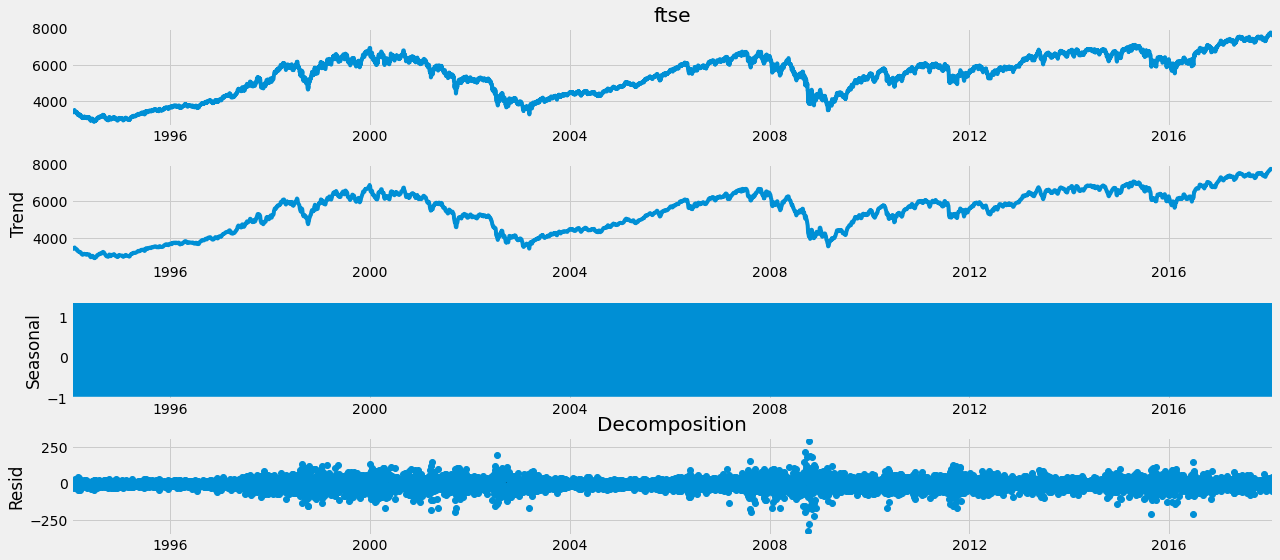

In [328]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
ftse_decom.plot()
plt.title('Decomposition',size = 20)

## AUTO ARIMA

In [329]:
from pmdarima import auto_arima

In [330]:
arima_oder = auto_arima(train_ret,max_order = None, max_p=7,max_q=7,trace = 1)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15842.036, Time=8.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15866.158, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15865.512, Time=0.73 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15865.203, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15865.439, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=15837.593, Time=4.54 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=15853.461, Time=1.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15841.204, Time=4.70 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=15809.163, Time=3.87 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=15820.927, Time=1.87 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=15808.834, Time=8.65 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=15806.219, Time=13.20 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=15809.151, Time=11.99 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=15804.075, Time=14.22 sec
 ARIMA(4,0,2)(0,

In [331]:
arma52 = ARIMA(train_ret,order = (5,0,2))

In [332]:
llr(arma52,model65,deg = 4)

0.18805929045234282

model for returns

In [333]:
model_result52 = arma52.fit()
model_result52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -7887.125
Date:                Wed, 16 Nov 2022   AIC                          15792.251
Time:                        12:32:39   BIC                          15850.941
Sample:                    01-10-1994   HQIC                         15812.817
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.284      0.199      -0.010       0.048
ar.L1          0.2823      0.076      3.690      0.000       0.132       0.432
ar.L2         -0.5093      0.074     -6.865      0.000      -0.655      -0.364
ar.L3         -0.0779      0.011     -7.003      0.000      -0.100      -0.056
ar.L4          0.0444      0.010      4.472      0.000       0.025       0.064
ar.L5         -0.1098      0.009    -12.197      0.000      -0.127      -0.092
ma.L1         -0.3061      0.076     -4.024      0.000      -0.455      -0.157
ma.L2          0.4658      0.076      6.151      0.000       0.317       0.614
sigma2         1.3558      0.015     92.415      0.000       1.327       1.385
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6407.38
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [334]:
reisd52 = model_result52.resid

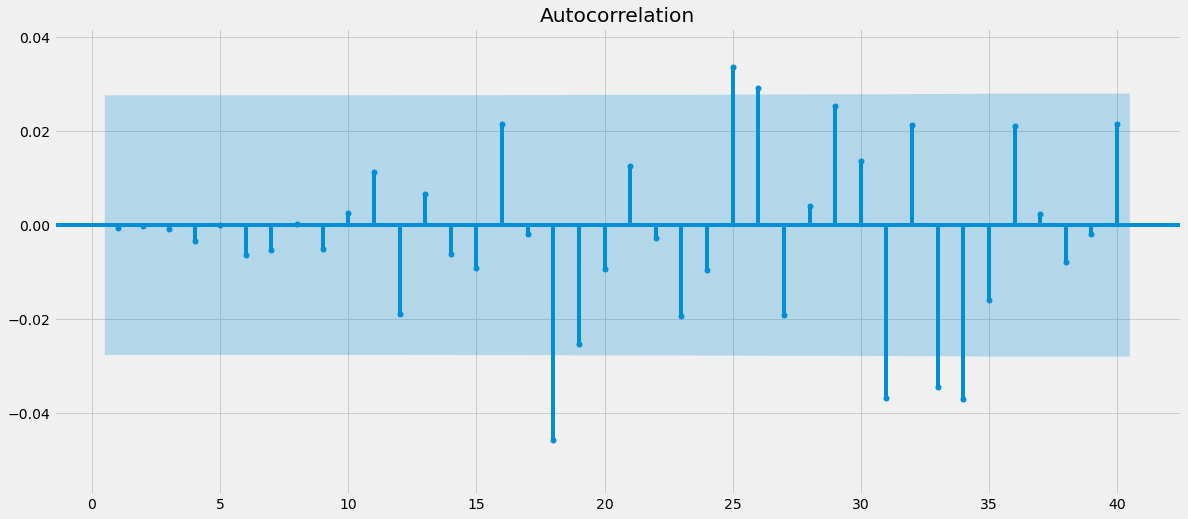

In [335]:
plot_acf(reisd52,lags = 40,zero = False,auto_ylims = True);

In [336]:
# Now lets predic with the model
start_date = test_ret.index[0]
end_date = test_ret.index[25]
pred_52 = model_result52.predict(start = start_date, end = end_date)

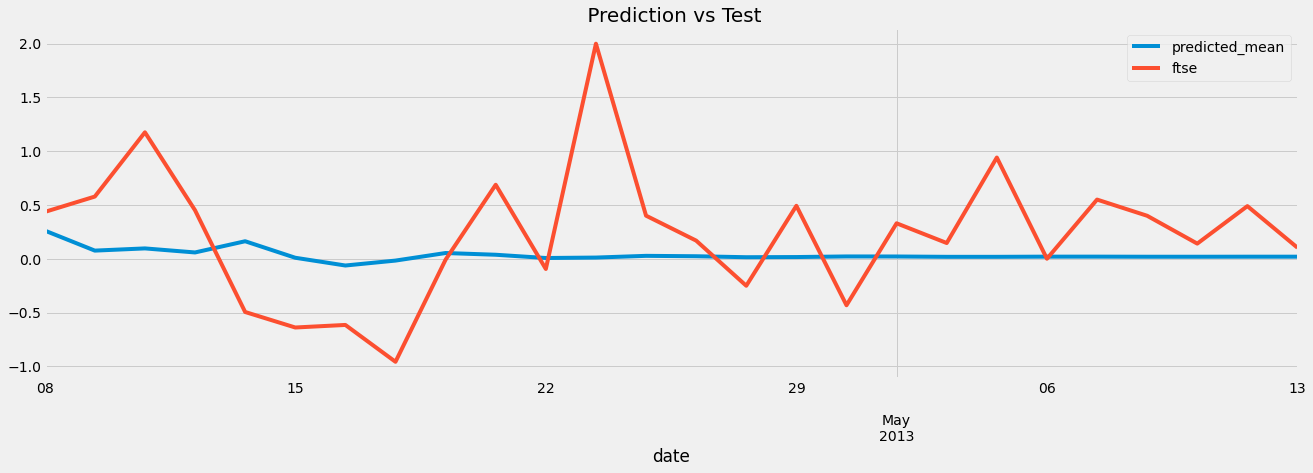

In [337]:
pred_52.plot(figsize = (20,6))
test_ret[:end_date].plot(figsize = (20,6))
plt.title(' Prediction vs Test',size = 20)
plt.legend()

# Adding exog variables

In [338]:
nikkie_ret = df['dax'].pct_change().mul(100)
dax_ret = df.nikkei.pct_change().mul(100)
spx_ret = df.spx.pct_change().mul(100)

In [339]:
nikkie_ret = nikkie_ret.dropna()
dax_ret = dax_ret.dropna()
spx_ret = spx_ret.dropna()

ret_df = pd.DataFrame({'ret_nikkie':nikkie_ret,'ret_dax':dax_ret,'ret_spx':spx_ret},index = returns.index)

In [340]:
ret_df.head()

,ret_nikkie,ret_dax,ret_spx
date,,,
1994-01-10,0.002247,1.762469,1.142796
1994-01-11,0.139326,0.226693,-0.239864
1994-01-12,-2.066335,1.669601,0.008437
1994-01-13,-1.818923,-1.152609,-0.358521
1994-01-14,0.405159,2.134007,0.516435


In [341]:
size2 = int(len(ret_df)*0.8)
exog_train =ret_df.iloc[:size2]
exog_test = ret_df.iloc[size2:]

In [342]:
arima_oder_exog = auto_arima(train_ret,max_order = None, max_p=7,max_q=7,trace = 1,exogenous = exog_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15842.036, Time=8.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15866.158, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15865.512, Time=0.74 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15865.203, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15865.439, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=15837.593, Time=4.53 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=15853.461, Time=1.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15841.204, Time=4.53 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=15809.163, Time=3.90 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=15820.927, Time=1.84 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=15808.834, Time=8.66 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=15806.219, Time=13.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=15809.151, Time=11.80 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=15804.075, Time=14.33 sec
 ARIMA(4,0,2)(0,

In [343]:
armax52 = ARIMA(train_ret,order = (5,0,2),exog = exog_train) 
armax_result52 = armax52.fit()
armax_result52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5020
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -5864.968
Date:                Wed, 16 Nov 2022   AIC                          11753.936
Time:                        12:36:32   BIC                          11832.190
Sample:                    01-10-1994   HQIC                         11781.357
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.008     -0.509      0.611      -0.019       0.011
ret_nikkie     0.3697      0.002    158.903      0.000       0.365       0.374
ret_dax        0.1105      0.006     19.482      0.000       0.099       0.122
ret_spx        0.2473      0.006     42.796      0.000       0.236       0.259
ar.L1          0.3780      0.183      2.062      0.039       0.019       0.737
ar.L2         -0.4372      0.134     -3.274      0.001      -0.699      -0.175
ar.L3         -0.1884      0.035     -5.311      0.000      -0.258      -0.119
ar.L4         -0.0032      0.014     -0.227      0.820      -0.031       0.024
ar.L5         -0.0787      0.014     -5.448      0.000      -0.107      -0.050
ma.L1         -0.6441      0.184     -3.499      0.000      -1.005      -0.283
ma.L2          0.5329      0.163      3.275      0.001       0.214       0.852
sigma2         0.6058      0.007     86.537      0.000       0.592       0.620
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             63284.62
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [344]:
# Now lets predic with the model
start_date = test_ret.index[0]
end_date = test_ret.index[25]
exog_pred_52 = armax_result52.predict(start = start_date, end = end_date, exog = exog_test[start_date:end_date])

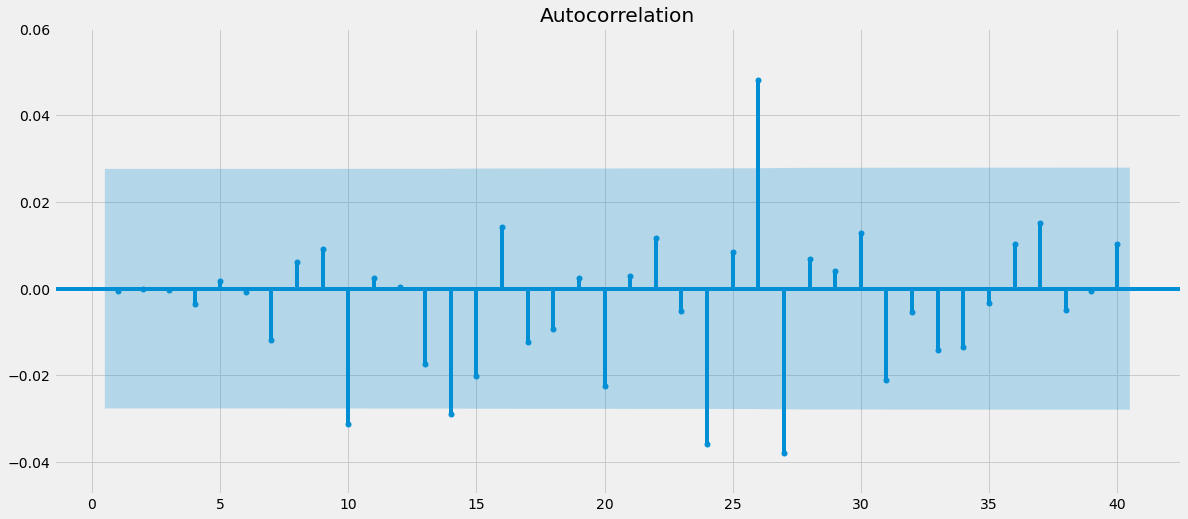

In [345]:
resid_exog = armax_result52.resid
plot_acf(resid_exog,lags = 40,zero = False,auto_ylims = True);

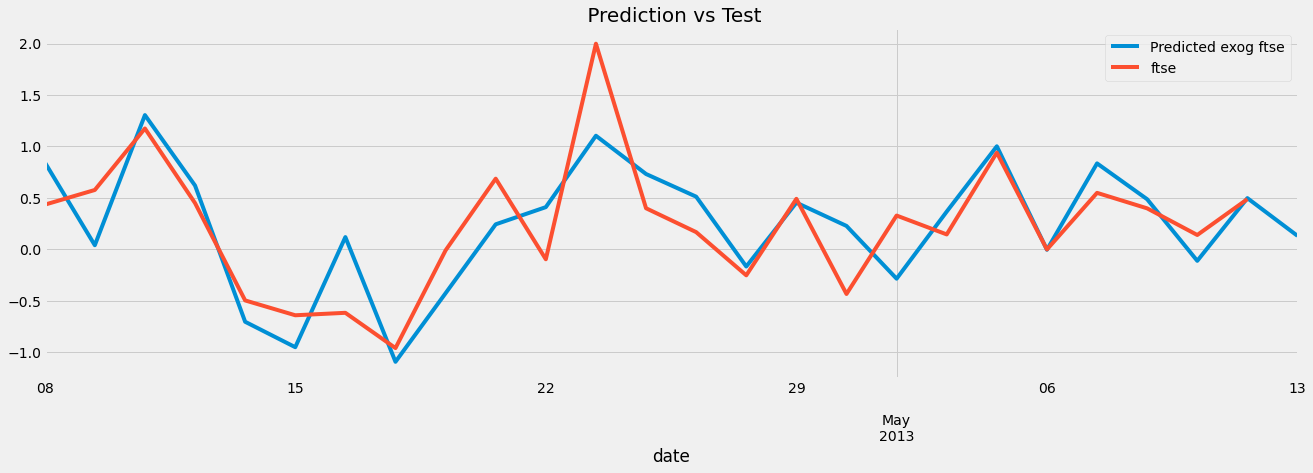

In [411]:
exog_pred_52.plot(figsize = (20,6),label = 'Predicted exog ftse')
test_ret[:end_date].plot(figsize = (20,6))
plt.title(' Prediction vs Test',size = 20)
plt.legend()

**Adding exogenous variables made significant improvement**

# Predicting Using the Rolling Forecast Origin

In [347]:
from pandas.tseries.offsets import BDay

In [348]:
import warnings
warnings.filterwarnings('ignore')

In [349]:
rolling_predictions = test_ret[:25].copy()
for end_date in test_ret.index[:25]:
    train_data = returns[:end_date-BDay(1)]
    model = ARIMA(train_data, order=(5,0,2))
    model_fit = model.fit()

    pred = model_fit.predict(end_date)
    rolling_predictions[end_date] = pred

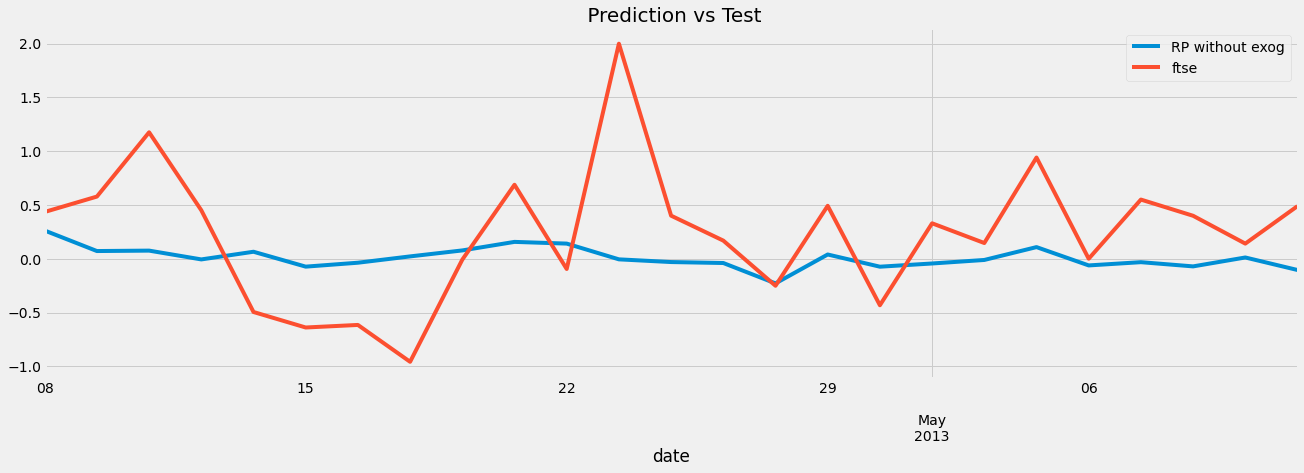

In [409]:
rolling_predictions.plot(figsize = (20,6),label = 'RP without exog')
test_ret[:end_date].plot(figsize = (20,6))
plt.title(' Prediction vs Test',size = 20)
plt.legend()

In [396]:
 exog_train[:end_date]

,ret_nikkie,ret_dax,ret_spx
date,,,
1994-01-10,0.002247,1.762469,1.142796
1994-01-11,0.139326,0.226693,-0.239864
1994-01-12,-2.066335,1.669601,0.008437
1994-01-13,-1.818923,-1.152609,-0.358521
1994-01-14,0.405159,2.134007,0.516435
...,...,...,...
2013-04-01,0.000000,-2.120438,-0.446858
2013-04-02,1.905761,-1.084382,0.517126
2013-04-03,-0.870105,2.988896,-1.054943


In [399]:
returns[:end_date]

date
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
1994-01-14    1.206842
                ...   
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
2013-04-08    0.434736
Freq: B, Name: ftse, Length: 5021, dtype: float64

In [405]:
exog_test.loc[end_date]

ret_nikkie    0.050792
ret_dax       2.796946
ret_spx       0.630430
Name: 2013-04-08 00:00:00, dtype: float64

In [406]:
rolling_predictions2 = test_ret[:25].copy()
for end_date in test_ret.index[:25]:
    train_data = returns[:end_date-BDay(1)]
    model = ARIMA(train_data, order=(5,0,2),exog = ret_df[:end_date-BDay(1)])
    model_fit = model.fit()

    pred = model_fit.predict(end_date,exog = exog_test.loc[end_date])
    rolling_predictions2[end_date] = pred

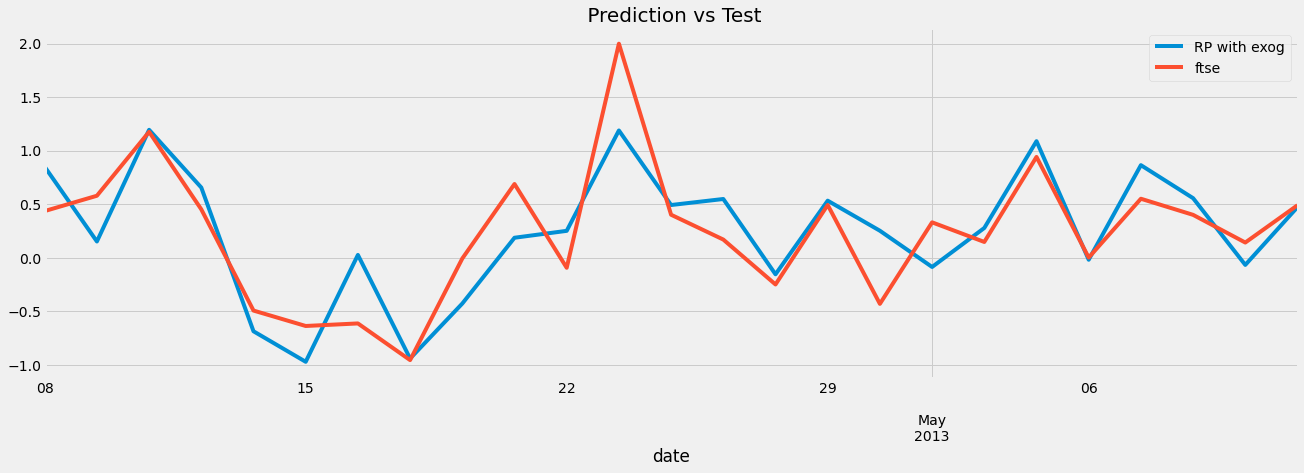

In [408]:
rolling_predictions2.plot(figsize = (20,6),label = 'RP with exog')
test_ret[:end_date].plot(figsize = (20,6))
plt.title(' Prediction vs Test',size = 20)
plt.legend()

## Comapring Results and Evaluating

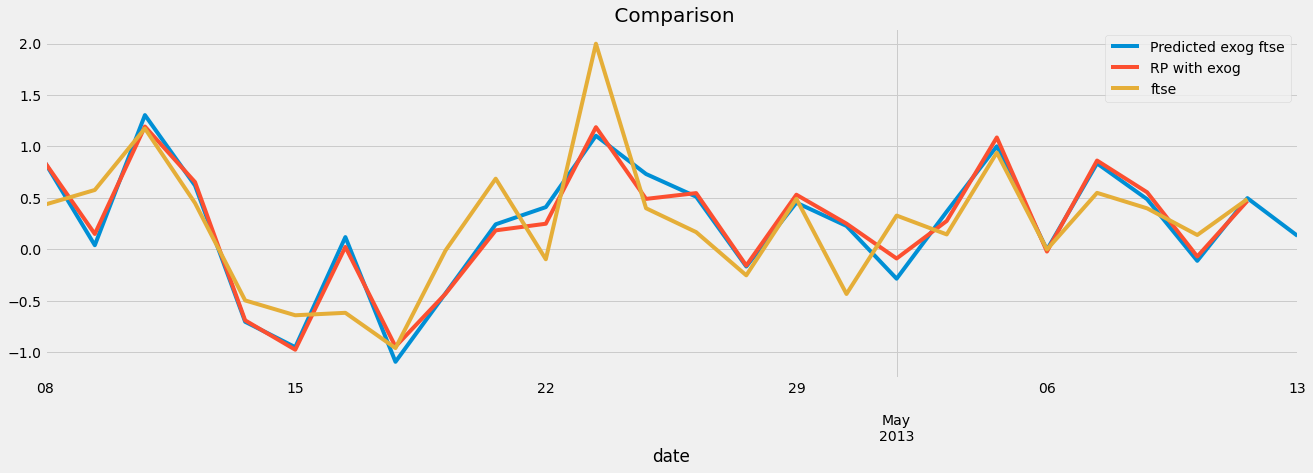

In [413]:
exog_pred_52.plot(figsize = (20,6),label = 'Predicted exog ftse')
rolling_predictions2.plot(figsize = (20,6),label = 'RP with exog')
test_ret[:end_date].plot(figsize = (20,6))
plt.title(' Comparison',size = 20)
plt.legend()

In [414]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [421]:
print('mae without rfo:',mean_absolute_error(test_ret[:26],exog_pred_52),'\nrmse:',rmse(test_ret[:26],exog_pred_52))
print('\nmae with rfo:',mean_absolute_error(test_ret[:25],rolling_predictions2),'\nrmse:',rmse(test_ret[:25],rolling_predictions2))

mae without rfo: 0.3046079944558348 
rmse: 0.3864786170034579

mae with rfo: 0.2809050246273441 
rmse: 0.3559756384912558


**Predicting with rolling forecast origin yeilds better result**

# Predicting Volatility with GARCH

In [422]:
from arch import arch_model

In [429]:
st_date = test_ret.index[0]
st_date

Timestamp('2013-04-08 00:00:00', freq='B')

In [428]:
end_date

Timestamp('2013-05-10 00:00:00', freq='B')

In [436]:
mod_garch = arch_model(returns, vol = "GARCH", p = 1, q = 1, mean = "constant", dist = "Normal")
result_garch = mod_garch.fit(last_obs = st_date, update_freq = 10)

Iteration:     10,   Func. Count:     64,   Neg. LLF: 6969.891799327499
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6969.891698633981
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


In [437]:
pred_garch = result_garch.forecast(horizon = 1, align = 'target')

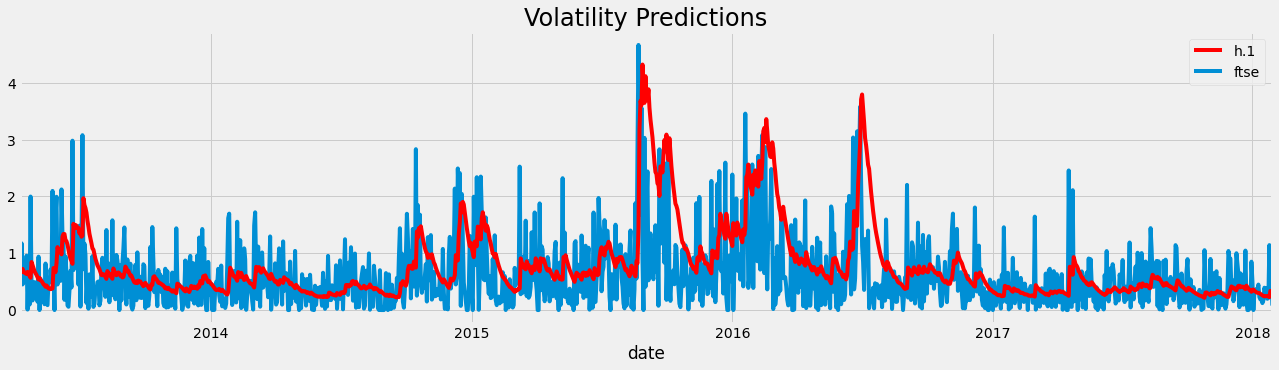

In [443]:
pred_garch.residual_variance[st_date:].plot(figsize = (20,5), color = "red", zorder = 2, label = 'Volatility')
test_ret.abs().plot( zorder = 1)
plt.title("Volatility Predictions", size = 24)
plt.legend()
plt.show()